# Aviation Accident Database Analysis

# Business Understanding

Goals for the Project: This project will use data cleaning, analysis, and visualization to generate insights for business stakeholders on to improve the quality and safety of traveling by Airplane.

The Business problem involves; breaking down and analysing the data to find the lowest risk Aircraft.
This will help the stakeholders to choose the right aircraft to purchase and invest in.

Data: I am using the Kaggle "Aviation Accident Database & Synopses, up to 2023" for my data. 

# Data Understanding

In [1]:
# Loading the necessary libraries
import pandas as pd # To manipulate the dataset
import numpy as np # for any statistics/averages
import matplotlib.pyplot as plt # visiaulaisation library
import seaborn as sns # more extensive visualization library
%matplotlib inline

In [2]:
#load the datasets loaded
df1 = pd.read_csv('Data/AviationData.csv',encoding='ISO-8859-1') #The usual encoding of utf-8 was not working.
df2 = pd.read_csv('Data/USState_Codes.csv',encoding='ISO-8859-1')

C:\Users\MichelleChekwooti\AppData\Local\Temp\ipykernel_9244\3973064077.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Data/AviationData.csv',encoding='ISO-8859-1') #The usual encoding of utf-8 was not working.


In [3]:
#This is to get a general overview of the first dataset..
df1.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df2.head(5) #To see the second dataset and see its significance in the analysis.

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [5]:
#Info is to understand the columns and their data types.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
df2.info() # info of the second dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [7]:
df1.describe() #To show the descriptive statistics of the integer columns inside the first dataset.

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
'''
This brief overview shows that there are 88889 rows of data in the Aviation dataset and they are 62 rows in,
inside the US city dataset.
Under head you see a number of NaN values, I also note that,
all columns in the first data set are non-null while that of the second data set,
has many object data columns most likely inconsistent data types.

We also note from the descriptive statistics that the max number of engines is 8, however,
the average is 1.
The max number of Fatal injuries is 349 but on average it is 1.This will help us,
understand the safety in terms of injuries for the airplanes.


Limitations in data:
There are not many numerical values which will make statistical analysis not as effective,
The data has many categorical values which may become difficult to fill in data cleaning.
They is an ID for Event but another column for registration number which is confusing,
as to which is the unique ID.
'''

'\nThis brief overview shows that there are 88889 rows of data in the Aviation dataset and they are 62 rows in,\ninside the US city dataset.\nUnder head you see a number of NaN values, I also note that,\nall columns in the first data set are non-null while that of the second data set,\nhas many object data columns most likely inconsistent data types.\n\nWe also note from the descriptive statistics that the max number of engines is 8, however,\nthe average is 1.\nThe max number of Fatal injuries is 349 but on average it is 1.This will help us,\nunderstand the safety in terms of injuries for the airplanes.\n\n\nLimitations in data:\nThere are not many numerical values which will make statistical analysis not as effective,\nThe data has many categorical values which may become difficult to fill in data cleaning.\nThey is an ID for Event but another column for registration number which is confusing,\nas to which is the unique ID.\n'

# Data Cleaning & Preparation

To prepare the data for analysis we will fix the mssing values and handle data types and duplicates.

I will focus on the first dataset as it has significant data for the analysis.

Missing values

In [9]:
df1.isna().sum() #The isna shows the true or false if null values are found then sum() adds the all.

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [10]:
'''
Multiple null values have been found in the majority of columns they will need to
be filled or dropped.
They are only dropped if the impact will be small compared to the dataset.
'''

'\nMultiple null values have been found in the majority of columns they will need to\nbe filled or dropped.\nThey are only dropped if the impact will be small compared to the dataset.\n'

In [11]:
#FILL
#The number of missing rows is very large compared to actual entries of 88889.
# So for all integer/float columns tye Nulls will be filled with the mean value.
# This will hopefully present less loss of data and not affect the analysis.
Mean_Number_of_Engines = df1['Number.of.Engines'].mean()
Mean_Fatal_Injuries = df1['Total.Fatal.Injuries'].mean()
Mean_Serious_Injuries = df1['Total.Serious.Injuries'].mean()
Mean_Minor_Injuries = df1['Total.Minor.Injuries'].mean()
Mean_Uninjured = df1['Total.Uninjured'].mean()

In [12]:
df1['Number.of.Engines'] = df1['Number.of.Engines'].fillna(Mean_Number_of_Engines)
df1['Total.Fatal.Injuries'] = df1['Total.Fatal.Injuries'].fillna(Mean_Fatal_Injuries)
df1['Total.Serious.Injuries'] = df1['Total.Serious.Injuries'].fillna(Mean_Serious_Injuries)
df1['Total.Minor.Injuries'] = df1['Total.Minor.Injuries'].fillna(Mean_Minor_Injuries)
df1['Total.Uninjured'] = df1['Total.Uninjured'].fillna(Mean_Uninjured)

In [13]:
df1.isna().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines             0
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [14]:
#Drop
#For the smaller null columns ike location, make, model, Amateur.Built, Country we will drop these.
#It is also difficult to find the average of categorical values, as they can all be unique and replacing them may affect the analysis.

#Drop smaller values
df1 = df1.dropna(subset= ['Location', 'Country', 'Make', 'Model','Amateur.Built', 'Injury.Severity'])
#Drop Missing dates as we want to do a Time series later on and weather conditions which I believe will be critical.
df1 = df1.dropna(subset= ['Publication.Date','Weather.Condition'])
#I could not drop the other columns as it would significantly reduce the data.

In [15]:
df1.isna().sum() #To check if they are still nulls.

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  38840
Longitude                 38850
Airport.Code              28708
Airport.Name              27008
Injury.Severity               0
Aircraft.damage            1704
Aircraft.Category         43075
Registration.Number         736
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                3163
FAR.Description           43073
Schedule                  62267
Purpose.of.flight          2656
Air.carrier               57069
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight     22125
Report.Status              2426
Publication.Date              0
dtype: i

In [16]:
#Because we still have some many missing values we can fill them with N/A
df1 = df1.fillna('N/A')

In [17]:
df1.isna().sum() 

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

Handling Duplicates 

In [18]:
#I remove duplicates in the data using the ID as I assume this is unique and should be single.
df1[df1['Event.Id'].duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,N/A,N/A,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,N/A,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,N/A,N/A,N/A,N/A,...,Personal,N/A,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983
160,20020917X02259,Accident,LAX82FA049B,1982-01-23,"VICTORVILLE, CA",United States,N/A,N/A,N/A,N/A,...,Personal,N/A,2.0,0.0,4.0,0.0,VMC,Cruise,Probable Cause,23-01-1983
245,20020917X02585,Accident,SEA82DA028B,1982-02-06,"MEDFORD, OR",United States,N/A,N/A,MFR,MEDFORD-JACKSON COUNTY,...,Personal,N/A,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
248,20020917X02173,Accident,LAX82DA065A,1982-02-06,"SAN JOSE, CA",United States,N/A,N/A,RHV,RIED HILLVIEW,...,Personal,N/A,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88387,20220822105776,Accident,ERA22LA379,2022-08-20,"Bealeton, VA",United States,038338N,0774255W,3VA3,Flying Circus Aerodrome,...,Business,N/A,0.0,2.0,0.0,2.0,VMC,N/A,N/A,27-09-2022
88538,20220918105957,Accident,CEN22FA424,2022-09-17,"Longmont, CO",United States,040619N,0105721W,N/A,N/A,...,Instructional,McAir Aviation,3.0,0.0,0.0,0.0,VMC,N/A,N/A,07-10-2022
88777,20221112106276,Accident,CEN23MA034,2022-11-12,"Dallas, TX",United States,324026N,0965146W,RBD,Dallas Executive,...,ASHO,Commemorative Air Force,6.0,0.0,0.0,0.0,VMC,N/A,N/A,30-11-2022
88796,20221121106336,Accident,WPR23LA041,2022-11-18,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,...,Instructional,702 HELICOPTER INC,0.0,0.0,0.0,3.0,VMC,N/A,N/A,07-12-2022


In [19]:
'''
They are 747 rows of duplicated data , I will drop these to ensure data entegrity.
'''

'\nThey are 747 rows of duplicated data , I will drop these to ensure data entegrity.\n'

In [20]:
#to drop I use drop duplicates then specify the event column and I state I only wnat the first ID to stay.
df1 = df1.drop_duplicates(subset=['Event.Id'],keep= 'first')

In [21]:
df1[df1['Event.Id'].duplicated()] #Just to check that the duplicates are gone.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


Transforming Data Types.

In [22]:
# to change the data types as it could cause errors when doing analysis.
#As the totals columns and Number.of.Engines are already float.
String_columns = [
'Latitude',
'Longitude',
'Location',
'Country',
'Airport.Code',
'Airport.Name',
'Injury.Severity',
'Aircraft.damage',
'Aircraft.Category',
'Registration.Number',
'Make',
'Model',
'Amateur.Built',
'Engine.Type',
'FAR.Description',
'Schedule',
'Purpose.of.flight',
'Air.carrier',
'Weather.Condition',
'Broad.phase.of.flight',
'Report.Status']

df1[String_columns] = df1[String_columns].apply(lambda x: x.astype(str)) # The lambda function just takes each row and converts this into string
# Apply helps to apply to every row in the dataset.

In [23]:
df1.info() # To check if the change worked.

<class 'pandas.core.frame.DataFrame'>
Index: 70392 entries, 1 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                70392 non-null  object 
 1   Investigation.Type      70392 non-null  object 
 2   Accident.Number         70392 non-null  object 
 3   Event.Date              70392 non-null  object 
 4   Location                70392 non-null  object 
 5   Country                 70392 non-null  object 
 6   Latitude                70392 non-null  object 
 7   Longitude               70392 non-null  object 
 8   Airport.Code            70392 non-null  object 
 9   Airport.Name            70392 non-null  object 
 10  Injury.Severity         70392 non-null  object 
 11  Aircraft.damage         70392 non-null  object 
 12  Aircraft.Category       70392 non-null  object 
 13  Registration.Number     70392 non-null  object 
 14  Make                    70392 non-null  obj

In [24]:
#Resetting the index. I want to change the index to the unique ID Events.
df1 = df1.set_index(['Event.Id'])
df1

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,N/A,N/A,N/A,N/A,Fatal(4),...,Personal,N/A,4.000000,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,N/A,N/A,Fatal(3),...,Personal,N/A,3.000000,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,N/A,N/A,N/A,N/A,Fatal(2),...,Personal,N/A,2.000000,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,N/A,N/A,N/A,N/A,Fatal(1),...,Personal,N/A,1.000000,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,N/A,N/A,Non-Fatal,...,N/A,Air Canada,0.647855,0.279881,1.000000,44.00000,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,325736N,1114536W,CGZ,Casa Grande Municipal Airport,Non-Fatal,...,Personal,N/A,0.000000,0.000000,0.000000,1.00000,VMC,N/A,N/A,13-12-2022
20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,Non-Fatal,...,Instructional,Knoxville Flight Training Academy,0.000000,0.000000,0.000000,1.00000,VMC,N/A,N/A,15-12-2022
20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.000000,0.000000,0.000000,1.00000,VMC,N/A,N/A,27-12-2022


The data is now prepared for analysis with no duplicates, missing values and a new index with the unique ID.


# Data Analysis

The stakeholders require an analysis of each aircraft and aspects that influence risk.
I will look at differences in each variable that influences Risk in an airplains.
The type of airplane, its use wether commercuial and private and how it influences its risk.

Questions I would like to look at involve:

Aircraft:
Make, model with lowest accidents top 5
Make, model with lowest Incidents top 5
Air.carrier with highest Total.Fatal.Injuries and least.
Aircraft.Category with highest Total.Fatal.Injuries and least.
Amateur.Built 

Accidents:
Total number of accidents over time with Total number of Incidents over time
country with the most accidents and least accidents.
Main causes for accidents- report highest.

Further deep analysis:
Engine.Type correlation with number of accidents, also Amateur.Built


In [25]:
df1['Make'].value_counts()

Make
Cessna           17242
Piper             9340
CESSNA            4259
Beech             3423
PIPER             2493
                 ...  
Gavilan              1
Baughman             1
Mcconnell            1
Micket               1
ORLICAN S R O        1
Name: count, Length: 7442, dtype: int64

CESSNA seems to be the same make as Cessna it could be an error. I will convert all text to small letter so they are many makes I am I want to catch any other doubles.

In [26]:
df1['Make'] = df1['Make'].str.lower()
df1

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,N/A,N/A,N/A,N/A,Fatal(4),...,Personal,N/A,4.000000,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,N/A,N/A,Fatal(3),...,Personal,N/A,3.000000,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,N/A,N/A,N/A,N/A,Fatal(2),...,Personal,N/A,2.000000,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,N/A,N/A,N/A,N/A,Fatal(1),...,Personal,N/A,1.000000,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,N/A,N/A,Non-Fatal,...,N/A,Air Canada,0.647855,0.279881,1.000000,44.00000,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221212106443,Accident,WPR23LA064,2022-12-09,"Casa Grande, AZ",United States,325736N,1114536W,CGZ,Casa Grande Municipal Airport,Non-Fatal,...,Personal,N/A,0.000000,0.000000,0.000000,1.00000,VMC,N/A,N/A,13-12-2022
20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,355745N,0835218W,DKX,KNOXVILLE DOWNTOWN ISLAND,Non-Fatal,...,Instructional,Knoxville Flight Training Academy,0.000000,0.000000,0.000000,1.00000,VMC,N/A,N/A,15-12-2022
20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,Non-Fatal,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.000000,0.000000,0.000000,1.00000,VMC,N/A,N/A,27-12-2022


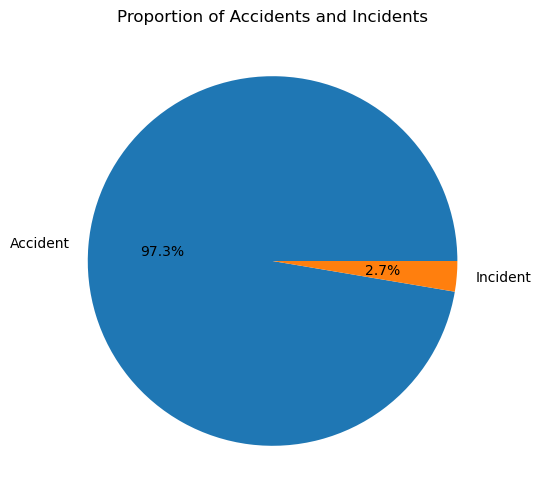

In [27]:
#I will focus on Accidents and Incidents in the column in the Investigation Type.

#This is because we are looking at risk and the aircraft's safety.
#Percentage of accidents and Incidents.
plt.figure(figsize=(6,6))
Accidents_and_Incidents = df1['Investigation.Type'].value_counts()
plt.pie(Accidents_and_Incidents,labels = Accidents_and_Incidents.index, autopct = '%1.1f%%' )
plt.title('Proportion of Accidents and Incidents')
plt.ylabel('')
plt.show()

In [28]:
'''
This shows they are alot more accidents concerning aircraft than incidents. An accident leads to serious injury and death while an incident is,
something that affects safety but not an accident. 
'''

'\nThis shows they are alot more accidents concerning aircraft than incidents. An accident leads to serious injury and death while an incident is,\nsomething that affects safety but not an accident. \n'

In [29]:
#Now I will break down accidents first, the Make & Model with lowest accidents (top 5)
#I extract only the data with Accidents. 
accidents = df1[df1['Investigation.Type'] == 'Accident']
accidents.head(5)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,N/A,N/A,N/A,N/A,Fatal(4),...,Personal,N/A,4.000000,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,N/A,N/A,Fatal(3),...,Personal,N/A,3.000000,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,N/A,N/A,N/A,N/A,Fatal(2),...,Personal,N/A,2.000000,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,N/A,N/A,N/A,N/A,Fatal(1),...,Personal,N/A,1.000000,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,N/A,N/A,Non-Fatal,...,N/A,Air Canada,0.647855,0.279881,1.000000,44.00000,VMC,Climb,Probable Cause,19-09-2017


In [30]:
# To get the lowest accidents I look for only the Model and count the accidents. I used reset_index to make it into dataset again.
lowest_accidents = accidents.groupby(['Make','Model'])['Investigation.Type'].count().reset_index()
lowest_accidents = lowest_accidents.sort_values(by = ['Investigation.Type'], ascending = True ) # To find the lowest I use ascending order.
lowest_accidents.head(10)#This shows the top 5 lowest accident Makes and Models in the industry.

,Make,Model,Investigation.Type
0,107.5 flying corporation,One Design DR 107,1
9681,mcfarland bill,CHALLENGER II,1
9682,mcfarland wm h,RANS S6S,1
9683,"mcfaul, daniel d.",Quicksilver GT500,1
9684,mcglashan,T-51 Mustang,1
9685,mcgrath robert f,SONEX,1
9686,mcguire,RAF2000,1
9687,mchargue,BUCKEYE DREAM,1
9688,mchenry george b jr,KR2S,1
9689,mcholland,GLASTAR,1


In [31]:
#I will now filter for Incidents to get a complete understanding.
incidents = df1[df1['Investigation.Type'] == 'Incident']
incidents.head(5)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,N/A,N/A,VNY,VAN NUYS,Incident,...,Personal,N/A,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983
20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,N/A,N/A,N/A,N/A,Incident,...,Business,N/A,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983
20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,N/A,N/A,ORD,CHICAGO O'HARE INTER'L,Incident,...,Unknown,Trans World Airlines,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983
20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,N/A,N/A,CKB,BENEDUM,Incident,...,Unknown,Aeromech Incorporated,0.0,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983
20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,N/A,N/A,IAD,N/A,Incident,...,Ferry,N/A,0.0,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983


In [32]:
# To get the lowest Incidents i look for only the Model and count the Incidents . I use reset_index to make it a dataset again.
lowest_incidents = incidents.groupby(['Make','Model'])['Investigation.Type'].count().reset_index()
lowest_incidents= lowest_incidents.sort_values(by = ['Investigation.Type'], ascending = True ) # To find the lowest I use ascending order.
lowest_incidents.head(10)#This shows the top 5 lowest Incidents Makes and Models in the industry.

,Make,Model,Investigation.Type
0,2007 savage air llc,EPIC LT,1
646,embraer,EMB-505,1
648,embraer,ERJ-135,1
649,embraer,ERJ170 200LR,1
650,enstrom,280,1
651,enstrom,F 28F,1
652,enstrom,F-28A,1
653,enstrom,F-28C,1
654,enstrom,F28C,1
656,eurocopter,AS 350 B3,1


Recommendation 1

In [33]:
'''
An incident is better than an accident in terms of safety, and therefore the Make and models with top incidents are more recommended for safety, than that  of the accidents.
You also notice that they are models that repeat for example for accidents it's mcfarland and for incidents its Embraer. 
I recommend that you focus on Models like the 107.5 flying corporation	One Design DR 107,mcfarland bill	CHALLENGER II, and mcfarland wm h	RANS S6S
which have few accidents .
Then also look at the 2007 savage air llc	EPIC LT,embraer	EMB-505, and the embraer	ERJ-135	for Incidents.
Focus on safe Makes like the Enstorm, embraer, and 2007 savage air ll if the specific Models are difficult to acquire.
'''

"\nAn incident is better than an accident in terms of safety, and therefore the Make and models with top incidents are more recommended for safety, than that  of the accidents.\nYou also notice that they are models that repeat for example for accidents it's mcfarland and for incidents its Embraer. \nI recommend that you focus on Models like the 107.5 flying corporation\tOne Design DR 107,mcfarland bill\tCHALLENGER II, and mcfarland wm h\tRANS S6S\nwhich have few accidents .\nThen also look at the 2007 savage air llc\tEPIC LT,embraer\tEMB-505, and the embraer\tERJ-135\tfor Incidents.\nFocus on safe Makes like the Enstorm, embraer, and 2007 savage air ll if the specific Models are difficult to acquire.\n"

In [34]:
# For further analysis I will look at the air carrier and Make with the highest Total.Fatal.Injuries and the least.
# To get the lowest accidents i look for only the Model and count the accidents . I use reset index to make it a dataset again.
Total_Injuries = df1.groupby(['Make'])['Total.Fatal.Injuries'].sum().reset_index()
Total_Injuries = Total_Injuries.sort_values(by = ['Total.Fatal.Injuries'], ascending = False ) # To find the lowest I use ascending order.
Total_Injuries.head(10)#This shows the top 5 lowest accident Makes and Models in the industry.

,Make,Total.Fatal.Injuries
1131,cessna,9120.416374
4762,piper,6072.891028
731,boeing,3863.907353
569,beech,3245.855320
583,bell,1104.510027
4048,mcdonnell douglas,1039.137660
164,airbus industrie,882.209916
1775,douglas,853.548524
4287,mooney,637.078941
5193,robinson,517.681615


In [35]:
#Make with the Lowest Total.Fatal.Injuries
Total_Injuries = Total_Injuries.sort_values(by = ['Total.Fatal.Injuries'], ascending = True ) # To find the lowest I use ascending order.
Total_Injuries.head(10)#This shows the top 5 lowest accident Makes and Models in the industry.

,Make,Total.Fatal.Injuries
6655,william m oprendek,0.0
1548,darney,0.0
1524,dan jelinek,0.0
1520,dale conover,0.0
1490,curtiss moses,0.0
1499,czech sport,0.0
1500,czech sport aircraft,0.0
1501,czech sport aircraft a s,0.0
1502,czech sport aircraft a.s.,0.0
1504,czech sportplanes sro,0.0


Recommendation 2

In [36]:
'''
The Makes to avoid the most include the cessna, piper, being, beech, bell, mcdonnell douglas, airbus industries, douglas, money and robinson.
As these have some of the highest Fatal injuries in the industry. 
The Makes that you can further focus on which are less prone to fatal injuries include the campbell john,holmes gary don,holmes william e,holmgren,
holmlund victor p	,holsclaw francis e, hood john sidney, john murphy, john roscoe.
These top Makes have has Zero Fatal injuries which assures maximum safetly and thus less risk.
'''

'\nThe Makes to avoid the most include the cessna, piper, being, beech, bell, mcdonnell douglas, airbus industries, douglas, money and robinson.\nAs these have some of the highest Fatal injuries in the industry. \nThe Makes that you can further focus on which are less prone to fatal injuries include the campbell john,holmes gary don,holmes william e,holmgren,\nholmlund victor p\t,holsclaw francis e, hood john sidney, john murphy, john roscoe.\nThese top Makes have has Zero Fatal injuries which assures maximum safetly and thus less risk.\n'

In [37]:
#Aircraft.Category with highest Total.Fatal.Injuries and least.
Aircraft_Injuries = df1.groupby(['Aircraft.Category'])['Total.Fatal.Injuries'].sum().reset_index()
Aircraft_Injuries = Aircraft_Injuries.sort_values(by = ['Total.Fatal.Injuries'], ascending = True ) # To find the lowest I use ascending order.
Aircraft_Injuries.head(100)#This shows the top 5 lowest Fatal Injuries and aircraft category

,Aircraft.Category,Total.Fatal.Injuries
10,ULTR,0.000000
9,Rocket,1.000000
8,Powered-Lift,1.295710
2,Blimp,1.943565
12,Unknown,2.000000
11,Ultralight,8.887131
13,WSFT,9.000000
7,Powered Parachute,14.000000
4,Gyrocraft,55.957103
1,Balloon,63.266351


In [38]:
Aircraft_Injuries = Aircraft_Injuries[Aircraft_Injuries['Aircraft.Category'] != 'N/A'] #To help filter out the N/A

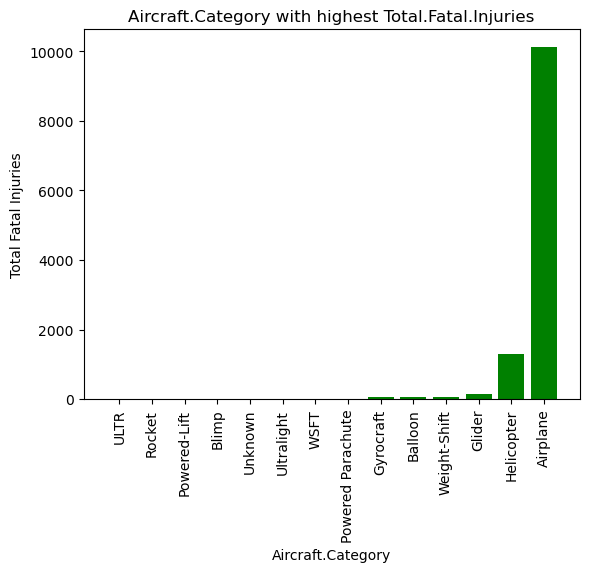

In [39]:
#This is a bar graph to visually see the lowest and highest.  
plt.bar(Aircraft_Injuries['Aircraft.Category'],Aircraft_Injuries['Total.Fatal.Injuries'], color='green') #The columns needed
plt.xlabel('Aircraft.Category') 
plt.xticks(rotation=90) # This is to make the categories veritical so that they all fit.
plt.ylabel('Total Fatal Injuries')
plt.title('Aircraft.Category with highest Total.Fatal.Injuries')

plt.show()

Recommendation 3

In [40]:
'''
As seen in the graph the most injury-prone aircraft is the airplane, compared to that of the Helicopter and even Rocket.
This shows that the company should consider having aircraft that move away from purchasing a large amount of Airplanes for safeflights.
However, I also note that Airplanes are practical, and therefore still needed in a business sense so I will further breakdown Airplanes,
To see which is the most safe.
'''

'\nAs seen in the graph the most injury-prone aircraft is the airplane, compared to that of the Helicopter and even Rocket.\nThis shows that the company should consider having aircraft that move away from purchasing a large amount of Airplanes for safeflights.\nHowever, I also note that Airplanes are practical, and therefore still needed in a business sense so I will further breakdown Airplanes,\nTo see which is the most safe.\n'

In [41]:
#Airplanes with the Lowest total Fatal. Injuries .
'''
In order to focus on airplanes I had to create a group by the can filter for airplanes with their Make, Model, Later on, I added total unInjuried
Because I realized I have to further filter as the number of non fatalities is very high so I added into the dataset and summed it also.

I aslo further added the column 'Aircraft.damage' to reduce the list of aircraft further into what I would consider the strongest.
'''
Airplane_Injuries= df1.groupby(['Aircraft.Category','Make', 'Model','Aircraft.damage'])[['Total.Fatal.Injuries','Total.Uninjured','Total.Serious.Injuries','Total.Minor.Injuries']].sum().reset_index()

In [42]:
#To filter for both Airplanes and Fatalities that are Zero. then store this inside a variable
Airplane_Injuries = Airplane_Injuries[(Airplane_Injuries['Aircraft.Category'] == 'Airplane') & (Airplane_Injuries['Total.Fatal.Injuries'] == 0 )]

In [43]:
Airplane_Injuries # just to see if it loads correctly

,Aircraft.Category,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Uninjured,Total.Serious.Injuries,Total.Minor.Injuries
0,Airplane,177mf llc,PITTS MODEL 12,Substantial,0.0,0.0,2.0,0.0
1,Airplane,2007 savage air llc,EPIC LT,Minor,0.0,4.0,0.0,0.0
2,Airplane,2021fx3 llc,CCX-2000,Substantial,0.0,4.0,0.0,0.0
3,Airplane,5 rivers llc,SQ-2,Substantial,0.0,1.0,0.0,1.0
4,Airplane,781569 inc,FX 210,Substantial,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...
7892,Airplane,ziermann,RV8,Substantial,0.0,0.0,0.0,1.0
7896,Airplane,zlin,Savage,Substantial,0.0,1.0,0.0,0.0
7897,Airplane,zlin,Z143,Substantial,0.0,1.0,0.0,0.0
7900,Airplane,zlin aviation,Savage Cub-S,Substantial,0.0,1.0,0.0,0.0


In [44]:
#To further reduce the dataset to safe airplanes
Airplane_Injuries = Airplane_Injuries[(Airplane_Injuries['Total.Serious.Injuries'] == 0) & (Airplane_Injuries['Total.Minor.Injuries'] == 0 )]
Airplane_Injuries

,Aircraft.Category,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Uninjured,Total.Serious.Injuries,Total.Minor.Injuries
1,Airplane,2007 savage air llc,EPIC LT,Minor,0.0,4.0,0.0,0.0
2,Airplane,2021fx3 llc,CCX-2000,Substantial,0.0,4.0,0.0,0.0
5,Airplane,aardema robert john,1 AARDEMA RAG WNG SP,Substantial,0.0,1.0,0.0,0.0
6,Airplane,ab sportine aviacija,Genesis 2,Substantial,0.0,1.0,0.0,0.0
11,Airplane,ackland jeffrey dean,SH 3R,Substantial,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7887,Airplane,zenith,Zodiac 601 XL,Substantial,0.0,1.0,0.0,0.0
7896,Airplane,zlin,Savage,Substantial,0.0,1.0,0.0,0.0
7897,Airplane,zlin,Z143,Substantial,0.0,1.0,0.0,0.0
7900,Airplane,zlin aviation,Savage Cub-S,Substantial,0.0,1.0,0.0,0.0


In [45]:
#This is still a very large list we can further filter for Total.Uninjured and see the highest number saved
Airplane_Injuries = Airplane_Injuries[(Airplane_Injuries['Total.Uninjured'] > 100) & (Airplane_Injuries['Aircraft.damage'] == 'Minor' )]
Airplane_Injuries = Airplane_Injuries.sort_values(by = ['Total.Uninjured'], ascending = False )
Airplane_Injuries

,Aircraft.Category,Make,Model,Aircraft.damage,Total.Fatal.Injuries,Total.Uninjured,Total.Serious.Injuries,Total.Minor.Injuries
1277,Airplane,boeing,737-732,Minor,0.0,577.0,0.0,0.0
340,Airplane,airbus,A330,Minor,0.0,560.0,0.0,0.0
371,Airplane,airbus industrie,A330-323,Minor,0.0,454.0,0.0,0.0
1369,Airplane,boeing,777-2Q8,Minor,0.0,403.0,0.0,0.0
346,Airplane,airbus,A340 - 300,Minor,0.0,397.0,0.0,0.0
4922,Airplane,mcdonnell douglas,DC-10-30F,Minor,0.0,393.0,0.0,0.0
1360,Airplane,boeing,777 222,Minor,0.0,378.0,0.0,0.0
1264,Airplane,boeing,737-3H4,Minor,0.0,320.0,0.0,0.0
319,Airplane,airbus,A319 115,Minor,0.0,294.0,0.0,0.0
1241,Airplane,boeing,737 7H4,Minor,0.0,246.0,0.0,0.0


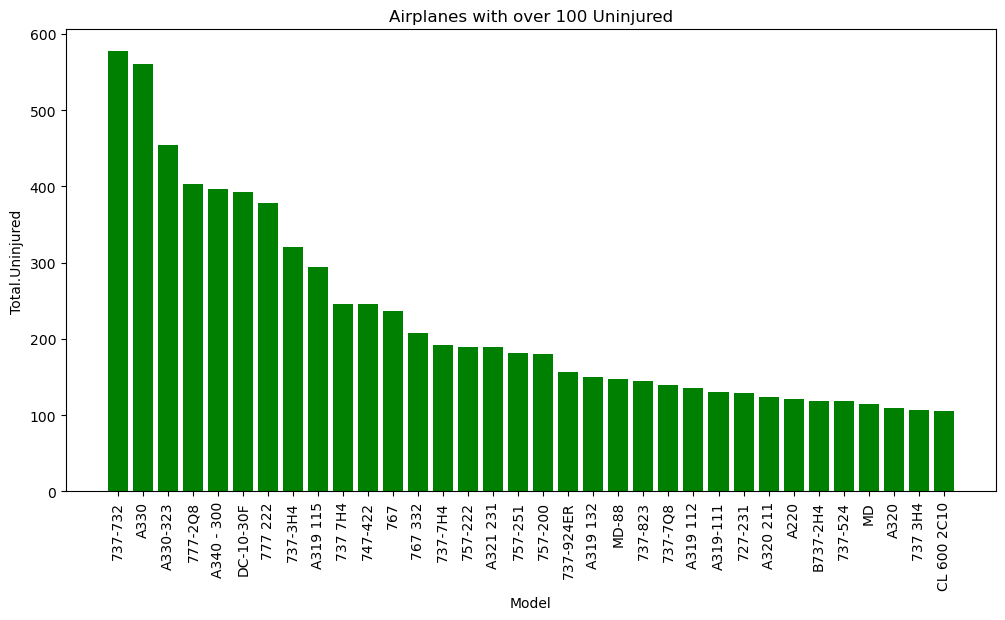

In [46]:
#I will turn this into a pie chat and bar chart
#Airplanes with over 100 Uninjured.
plt.figure(figsize=(12, 6))
plt.bar(Airplane_Injuries['Model'],Airplane_Injuries['Total.Uninjured'], color ='green')
plt.xlabel('Model')
plt.ylabel('Total.Uninjured')
plt.title('Airplanes with over 100 Uninjured')
plt.xticks(rotation=90)
plt.show()
        

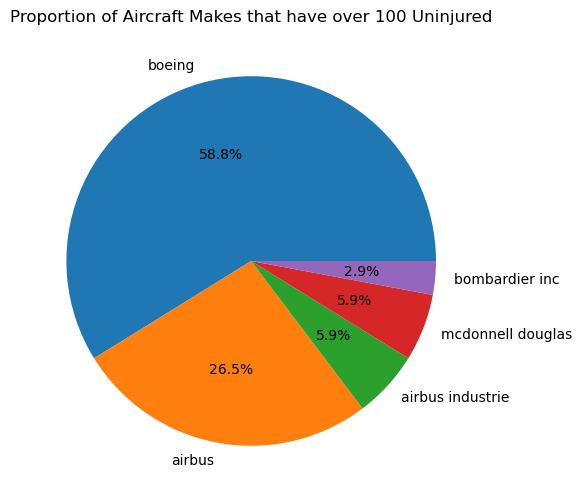

In [47]:
plt.figure(figsize=(6,6))
Aircraft_Makes = Airplane_Injuries['Make'].value_counts()
plt.pie(Aircraft_Makes, labels = Aircraft_Makes.index, autopct = '%1.1f%%' )
plt.title('Proportion of Aircraft Makes that have over 100 Uninjured')
plt.ylabel('')
plt.show()

Recommendation 4 

In [48]:
'''
If you have to get an airplane you can focus on the least risky which is the 737-732.
This shows a Data set of all of the least risky airplanes, with the best being the boeing	737-732	which leads me to assume that,
despite the boeing Make being on the list for some of the highest number of accidents it is also ranked for having the highest number of
Uninjured. The Make is very strong and the model has the least amount of Injuries and leaves with minor damage.
'''

'\nIf you have to get an airplane you can focus on the least risky which is the 737-732.\nThis shows a Data set of all of the least risky airplanes, with the best being the boeing\t737-732\twhich leads me to assume that,\ndespite the boeing Make being on the list for some of the highest number of accidents it is also ranked for having the highest number of\nUninjured. The Make is very strong and the model has the least amount of Injuries and leaves with minor damage.\n'

In [49]:
df1 = df1.reset_index()

In [50]:
df1.to_csv('Cleaned_AviationData.csv',index = False)#extract the data for tableau
